# Back propagation algorithm
_María Camila Vásquez Correa_

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

## Data to fit
Logic gates AND, OR and XOR

In [21]:
def f(a, b):
    return a | b

In [22]:
# possible values of both variables
a_pos = [0, 1]
b_pos = [0, 1]

X = np.array(list(itertools.product(a_pos, b_pos)))
y = np.array(list(map(lambda x: f(*x), X)))
y = y
X = X.T

print(X)
print(y)

[[0 0 1 1]
 [0 1 0 1]]
[0 1 1 1]


In [25]:
# weights and bias initialization
W = np.random.random(2)
b = np.random.random(1)

# activation function
# ReLu
def activation(x):
    return np.where(x > 0, x, 0)

# Loss functions
# Sum of squared errors
def loss(y, z) -> float:
    return np.sum((y - z)**2)

In [26]:
# Initial loss
loss(y, activation(W @ X + b))

1.0499206844090079

In [28]:
# Learning rate for the gradient descent
lr = 1e-1

In [31]:
for _ in range(15):
    # forward pass
    h = W @ X + b
    z = activation(h)
    f = loss(y, z)
    
    print(f)

    # backward
    df_df = 1
    df_dz = df_df * (2 * (z - y)) 
    df_dh = df_dz * np.where(h > 0, 1, 0)
    df_dW = df_dh @ X.T
    df_db = np.sum(df_dh * 1)

    W -= lr * df_dW
    b -= lr * df_db

0.25000244252690695
0.25000182060420206
0.2500013620037601
0.25000102218325587
0.2500007692813338
0.25000058034180683
0.25000043871138783
0.2500003322321976
0.2500002519763548
0.2500001913530576
0.25000014547360677
0.2500001106964544
0.2500000842989008
0.2500000642385827
0.2500000489791107


In [32]:
z

array([0.25017816, 0.75000884, 0.75004708, 1.24987776])

In [33]:
b

array([0.25015579])

In [34]:
W

array([0.49988395, 0.49985336])

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
xx, yy = np.meshgrid(np.arange(20) / 10 - 0.5,
                     np.arange(20) / 10 - 0.5)
zz = np.concatenate([xx.reshape(1, 20, 20), yy.reshape(1, 20, 20)])

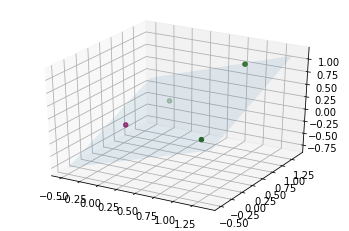

In [20]:
plt3d = plt.figure().gca(projection='3d')
plt3d.scatter(X[0, :], X[1, :], y, c=np.where(W @ X + b > 0, 1, 0), cmap='PiYG')
plt3d.plot_surface(xx, yy, (zz.T @ W).T + b, alpha=0.1)
plt.show()